**Chapter 9 Homework**

1. What is unsupervised learning?

                Unsupervised learning describes a type of machine learning system where the desired outcomes are not known, and thus no labels are attached to the training data.

2. Describes what the K-Means clustering algorithm seeks to do when we train it on a dataset.
 
                The K-Means clustering algorithm groups points together by finding a given set number of points and bounding a given region, to which the collection of points within the region are closest to a given center point and adequately clustered/separated. New points are classified by proximity to a given center point.

3. Descibe how the K-Means algorithm works -- what are the steps to discovering a cluster?

                Initially, a random set of n points is taken, and each training point's distance is taken from each centroid point. The mean of points in each cluster and their distance is then used to refine the search for new centroid points, and new labels are defined (regions around which points are closest to a centroid). This is iterated until the location of the centroids converges on a set of points around which the mean of the distance of training points is close to equivalency.

**Scripting Homework**

    Generate 3-4 disctinct blobs of points in 2 dimensions and run K-means on it. 

In [1]:
from utils.data_handling_lib import split_dataset, RANDOM_STATE
from utils.graphics_lib import save_fig, plot_fig, plot_silhoutte_diagram

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.cluster import KMeans

In [2]:
X_moons, y_moons = make_moons(n_samples=3000, noise=None, random_state=RANDOM_STATE)

train, train_labels, test, test_labels = split_dataset(X_moons, y_moons)

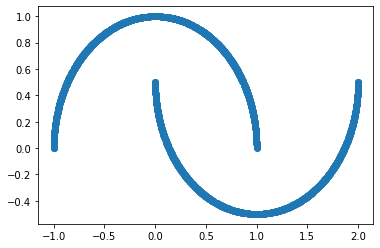

In [3]:
plt.scatter(x=train[:, 0], y=train[:, 1])

plt.show()

In [4]:
from sklearn.datasets import make_blobs

X_blobs, y_blobs, centers = make_blobs(n_samples=1500, centers=4, n_features=2, return_centers=True, random_state=RANDOM_STATE)

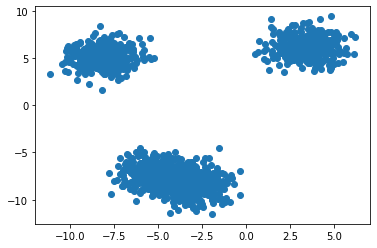

In [5]:
plt.scatter(X_blobs[:, 0], X_blobs[:, 1])

plt.show()

In [6]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_blobs)

In [7]:
y_pred

array([2, 0, 2, ..., 2, 1, 0])

In [8]:
y_pred is kmeans.labels_

True

In [9]:
print(f"K-Means Cluster Centers:\n{kmeans.cluster_centers_}\n",
      f"\nGenerated Cluster Centers:\n{centers}")

K-Means Cluster Centers:
[[-8.08339718  5.12808227]
 [-4.17075649 -7.80444108]
 [ 3.43916538  6.15956613]]
 
Generated Cluster Centers:
[[-8.04932797  5.22499433]
 [-5.06124054 -7.23736625]
 [-3.37106873 -8.3400087 ]
 [ 3.43954163  6.13187596]]


In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

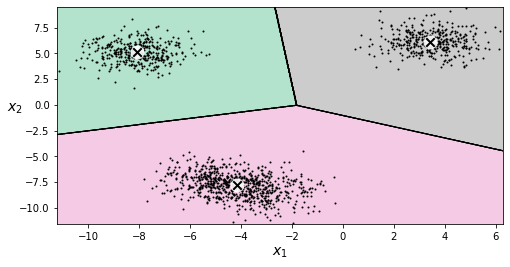

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_blobs)

In [12]:
from sklearn.cluster import MiniBatchKMeans

mini_kmeans = MiniBatchKMeans(n_clusters=3)
mini_kmeans.fit(X_blobs)

MiniBatchKMeans(n_clusters=3)

Mini K-Means Cluster Centers:
[[ 3.43911629  6.18383008]
 [-4.19072667 -7.80892292]
 [-8.09816816  5.12767755]]
 
Generated Cluster Centers:
[[-8.04932797  5.22499433]
 [-5.06124054 -7.23736625]
 [-3.37106873 -8.3400087 ]
 [ 3.43954163  6.13187596]]


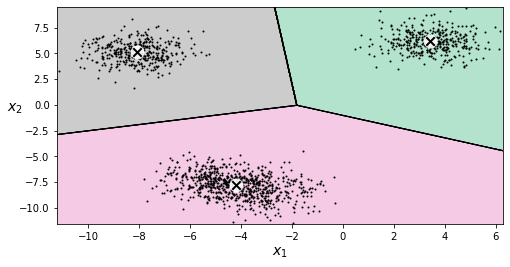

In [13]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(mini_kmeans, X_blobs)

print(f"Mini K-Means Cluster Centers:\n{mini_kmeans.cluster_centers_}\n",
      f"\nGenerated Cluster Centers:\n{centers}")

**Example Construction of K-Means Algorithm**

In [14]:
import math

def select_random_points(data, n_clusters):
    return None

**Chapter 9 pp 248-260**

Exercises
1. Return to the python script from your last homework. Use the silhouette score to see whether the "best" number of clusters is as you would expect it to be. 
2. Work through the example of using clustering to do dimensionality reduction with the MNIST digits dataset. When we pre-process the dataset using KMeans, what data are we training the model on? What is the dimension of the original data, and what is the dimension of the processed data?
    Preprocessing the MNIST/grayscale 8x8 dataset replaces the data regarding pixel intensity with data that measures the distance of each pixel to n clusters, and trains the model on the distance (ie. post-processed KMeans) data rather than pixel intensity. The original MNIST dataset was 784D (28px^2), and the data is reduced to n points (n=[40,100]).
3. Do as the book suggests at the bottom of page 252, and try a grid search using cluster numbers up to, say, 150. Can we make our classifier any better? 

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_score(X_blobs, kmeans.labels_)

0.8391099937049388

In [17]:
kmeans_set = [KMeans(n_clusters=k, random_state=42).fit(X_blobs)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_set]

In [18]:
silhouette_scores = [silhouette_score(X_blobs, model.labels_)
                     for model in kmeans_set[1:]]

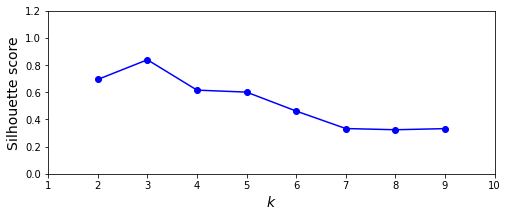

In [19]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 10, 0, 1.2])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

From the silhouette score, we see that 3 clusters has the highest performance, which matches with the expectations I had (created 3 blobs)

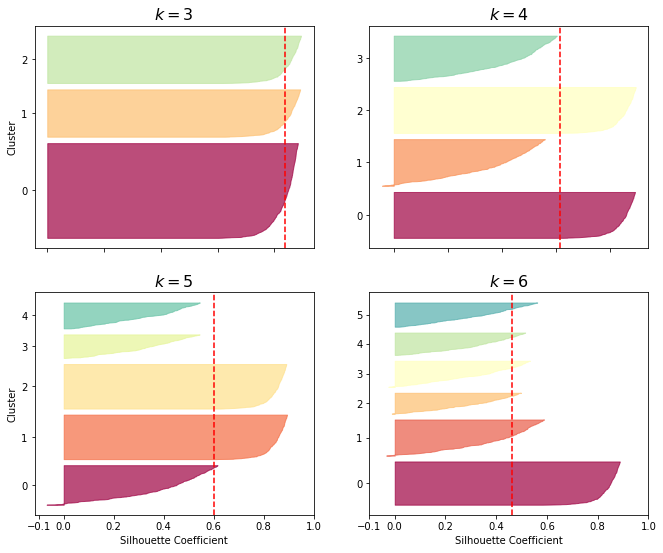

In [20]:
plot_silhoutte_diagram(X_blobs, kmeans_set=kmeans_set, silhouette_scores=silhouette_scores)

In [21]:
from sklearn.datasets import fetch_openml
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)

In [22]:
X_train, X_test, y_train, y_test = split_dataset(X_mnist, y_mnist)

Logistic Regression, MNIST is too high dimension for this type of model, do not use

In [23]:
from sklearn.linear_model import LogisticRegression

#log_reg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
#log_reg.fit(X_train, y_train)

Using GridSearchCV on KMeans Clustering Algorithm

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#param_grid = {"n_clusters":[10,100,250]}

pipe = Pipeline([
    ("kmeans", KMeans(n_clusters=35, random_state=RANDOM_STATE)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=RANDOM_STATE))
])

In [25]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=35, random_state=19)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=19))])

In [26]:
param_grid = dict(kmeans__n_clusters=[35,50,150,250])

search = GridSearchCV(pipe,param_grid=param_grid)

In [27]:
search.fit(X_train, y_train)

g:\006_CDS121\07_InClassProject\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
g:\006_CDS121\07_InClassProject\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

GridSearchCV(estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=35, random_state=19)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=19))]),
             param_grid={'kmeans__n_clusters': [35, 50, 150, 250]})

In [28]:
search.best_params_

{'kmeans__n_clusters': 250}

In [ ]:
best_pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=35, random_state=RANDOM_STATE)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=RANDOM_STATE))
])

best_pipeline.fit(X_train, y_train)

In [ ]:
mnist_predictions_post = best_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, mnist_predictions_post)